In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/Modeling_DSL/data/4명분_리뷰_라벨_test.xlsx')
df = pd.read_excel('/content/drive/MyDrive/Modeling_DSL/data/원본데이터/test_원본.xlsx')
df.rename(columns={'긍부정': 'Label'}, inplace=True)

In [ ]:
df

,Sentence,Label
0,그리고 불고기도 시켜 먹었는데 맛있었습니다,1
1,평범하게 맛있는 적당한 소갈비찜 가게,1
2,맵찔이라 카레를 1단계로 시켰는데 그래도 맵더라구요,0
3,한 달 전인가 냉면 생각나서 먹으러 갔다가 정말로 돈 버렸다고 생각하고 나옴,0
4,진짜 좋다,1
...,...,...
537,항정살 너무 잘 먹고 왔어요,1
538,신촌역 근처에 위치한 분위기 좋은 넓찍한 카페적당히 조용시끌시끌 그 사이에 있어 수...,1
539,이 집 돈까스 먹어보면 다른 집 못 감가격적인 메리트부터 맛까지 좋으니 안 갈 이유...,1
540,잔잔한 음악과 모네그림을 닮은 자연에 둘러쌓인 평화로운 느낌과 편안한 자리와 사람들...,1


# 모델

In [ ]:
#
from transformers import pipeline

kc = pipeline("fill-mask", model="seoyeon96/KcELECTRA-MLM")

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
multi = pipeline(
    "sentiment-analysis", model="sangrimlee/bert-base-multilingual-cased-nsmc"
)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

kobert = pipeline("sentiment-analysis", model="monologg/kobert")

config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline

elect = pipeline("text-classification", model="daekeun-ml/koelectra-small-v3-nsmc")

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/56.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/534k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# 결과




*   koelec: 82.8%
*   kobert: 63.0%
* multilingual : 79.6%



In [ ]:
kcdf = pd.DataFrame(columns=['판별라벨', '진짜라벨', '내용'])

for i in range(len(df)):
    v = 0
    v = kc(df['Sentence'][i])
    # 새로운 행을 생성하여 값을 할당합니다.
    kcdf.loc[i, '판별라벨'] = v[0]['label']
    kcdf.loc[i, '진짜라벨'] = df['Label'][i]
    kcdf.loc[i, '내용'] = df['Sentence'][i]

# '판별라벨'과 '진짜라벨' 열을 문자열로 변환합니다.
kcdf['판별라벨'] = kcdf['판별라벨'].astype(str)
kcdf['진짜라벨'] = kcdf['진짜라벨'].astype(str)

# '판별라벨'과 '진짜라벨' 열이 같은 경우를 세어봅니다.
same_count = kcdf[kcdf['판별라벨'] == kcdf['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count / len(df))

## electra

In [ ]:
electdf = pd.DataFrame(columns=['판별라벨', '진짜라벨', '내용'])

for i in range(len(df)):
    v = 0
    v = elect(df['Sentence'][i])
    # 새로운 행을 생성하여 값을 할당합니다.
    electdf.loc[i, '판별라벨'] = v[0]['label']
    electdf.loc[i, '진짜라벨'] = df['Label'][i]
    electdf.loc[i, '내용'] = df['Sentence'][i]

# '판별라벨'과 '진짜라벨' 열을 문자열로 변환합니다.
electdf['판별라벨'] = electdf['판별라벨'].astype(str)
electdf['진짜라벨'] = electdf['진짜라벨'].astype(str)

# '판별라벨'과 '진짜라벨' 열이 같은 경우를 세어봅니다.
same_count = electdf[electdf['판별라벨'] == electdf['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count / len(df))


두 열의 값이 같은 경우의 수: 0.8394833948339483


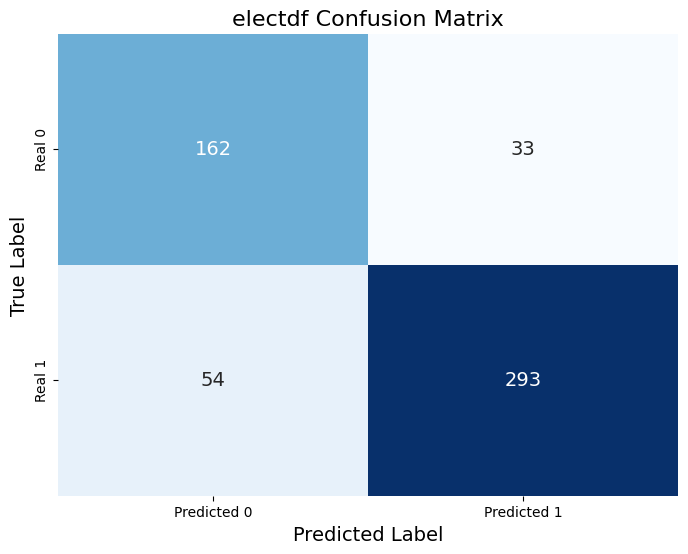

Precision: 0.8987730061349694
Recall: 0.8443804034582133
F1-score: 0.8707280832095097
Accuracy: 0.8394833948339483


In [ ]:
true_positive = ((electdf['판별라벨'] == '1') & (electdf['진짜라벨'] == '1')).sum()
false_positive = ((electdf['판별라벨'] == '1') & (electdf['진짜라벨'] == '0')).sum()
true_negative = ((electdf['판별라벨'] == '0') & (electdf['진짜라벨'] == '0')).sum()
false_negative = ((electdf['판별라벨'] == '0') & (electdf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('electdf Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Precision 계산
precision = true_positive / (true_positive + false_positive)

# Recall 계산
recall = true_positive / (true_positive + false_negative)

# F1-score 계산
f1_score = 2 * (precision * recall) / (precision + recall)

# Accuracy 계산
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy:", accuracy)


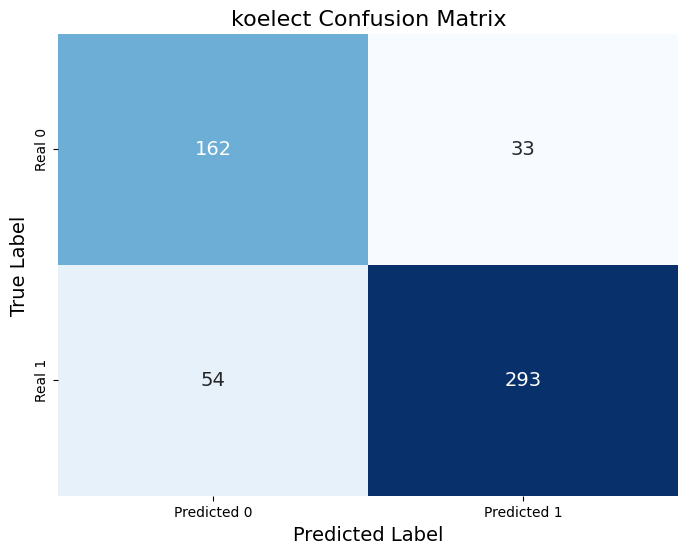

In [ ]:
true_positive = ((electdf['판별라벨'] == '1') & (electdf['진짜라벨'] == '1')).sum()
false_positive = ((electdf['판별라벨'] == '1') & (electdf['진짜라벨'] == '0')).sum()
true_negative = ((electdf['판별라벨'] == '0') & (electdf['진짜라벨'] == '0')).sum()
false_negative = ((electdf['판별라벨'] == '0') & (electdf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('koelect Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


## kobert

In [ ]:
kobertdf = pd.DataFrame(columns=['판별라벨', '진짜라벨', '내용'])

for i in range(len(df)):
    v=0
    v = kobert(df['Sentence'][i])
    # 새로운 행을 생성하여 값을 할당합니다.
    kobertdf.loc[i, '판별라벨'] = v[0]['label'][-1]
    kobertdf.loc[i, '진짜라벨'] = df['Label'][i]
    kobertdf.loc[i, '내용'] = df['Sentence'][i]


# '판별라벨'과 '진짜라벨' 열을 문자열로 변환합니다.
kobertdf['판별라벨'] = kobertdf['판별라벨'].astype(str)
kobertdf['진짜라벨'] = kobertdf['진짜라벨'].astype(str)

# '판별라벨'과 '진짜라벨' 열이 같은 경우를 세어봅니다.
same_count = kobertdf[kobertdf['판별라벨'] == kobertdf['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count/len(df))


두 열의 값이 같은 경우의 수: 0.6309963099630996


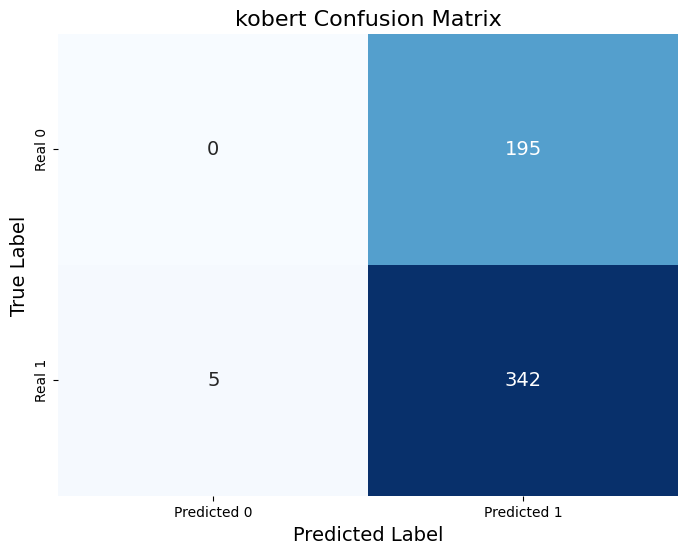

Precision: 0.6368715083798883
Recall: 0.9855907780979827
F1-score: 0.7737556561085974
Accuracy: 0.6309963099630996


In [ ]:
true_positive = ((kobertdf['판별라벨'] == '1') & (kobertdf['진짜라벨'] == '1')).sum()
false_positive = ((kobertdf['판별라벨'] == '1') & (kobertdf['진짜라벨'] == '0')).sum()
true_negative = ((kobertdf['판별라벨'] == '0') & (kobertdf['진짜라벨'] == '0')).sum()
false_negative = ((kobertdf['판별라벨'] == '0') & (kobertdf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('kobert Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Precision 계산
precision = true_positive / (true_positive + false_positive)

# Recall 계산
recall = true_positive / (true_positive + false_negative)

# F1-score 계산
f1_score = 2 * (precision * recall) / (precision + recall)

# Accuracy 계산
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy:", accuracy)


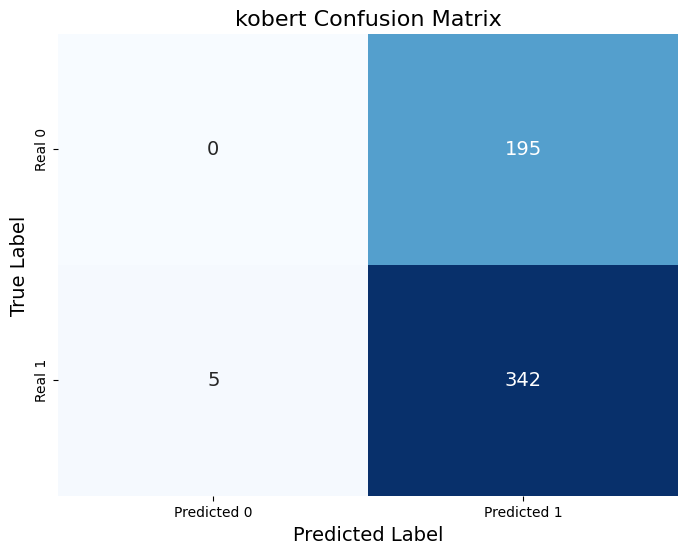

In [ ]:
true_positive = ((kobertdf['판별라벨'] == '1') & (kobertdf['진짜라벨'] == '1')).sum()
false_positive = ((kobertdf['판별라벨'] == '1') & (kobertdf['진짜라벨'] == '0')).sum()
true_negative = ((kobertdf['판별라벨'] == '0') & (kobertdf['진짜라벨'] == '0')).sum()
false_negative = ((kobertdf['판별라벨'] == '0') & (kobertdf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('kobert Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

## 멀티링궐 기반

In [ ]:
multidf = pd.DataFrame(columns=['판별라벨', '진짜라벨', '내용'])
for i in range(len(df)):
    v=0
    v = multi(df['Sentence'][i])
    # 새로운 행을 생성하여 값을 할당합니다.
    multidf.loc[i, '판별라벨'] = v[0]['label']
    multidf.loc[i, '진짜라벨'] = df['Label'][i]
    multidf.loc[i, '내용'] = df['Sentence'][i]


# '판별라벨'과 '진짜라벨' 열을 문자열로 변환합니다.
multidf['판별라벨'] = multidf['판별라벨'].astype(str)  #542
multidf['진짜라벨'] = multidf['진짜라벨'].astype(str)  #542

# '판별라벨'과 '진짜라벨' 열이 같은 경우를 세어봅니다.
same_count = multidf[multidf['판별라벨'] == multidf['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count/len(df))


두 열의 값이 같은 경우의 수: 0.0


In [ ]:
multidf['판별라벨'] = multidf['판별라벨'].map({'positive': '1', 'negative': '0'})
same_count = multidf[multidf['판별라벨'] == multidf['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count/len(df))
multidf

두 열의 값이 같은 경우의 수: 0.7896678966789668


,판별라벨,진짜라벨,내용
0,1,1,그리고 불고기도 시켜 먹었는데 맛있었습니다
1,0,1,평범하게 맛있는 적당한 소갈비찜 가게
2,1,0,맵찔이라 카레를 1단계로 시켰는데 그래도 맵더라구요
3,0,0,한 달 전인가 냉면 생각나서 먹으러 갔다가 정말로 돈 버렸다고 생각하고 나옴
4,1,1,진짜 좋다
...,...,...,...
537,1,1,항정살 너무 잘 먹고 왔어요
538,1,1,신촌역 근처에 위치한 분위기 좋은 넓찍한 카페적당히 조용시끌시끌 그 사이에 있어 수...
539,0,1,이 집 돈까스 먹어보면 다른 집 못 감가격적인 메리트부터 맛까지 좋으니 안 갈 이유...
540,1,1,잔잔한 음악과 모네그림을 닮은 자연에 둘러쌓인 평화로운 느낌과 편안한 자리와 사람들...


In [ ]:
df

,Sentence,Label
0,그리고 불고기도 시켜 먹었는데 맛있었습니다,1
1,평범하게 맛있는 적당한 소갈비찜 가게,1
2,맵찔이라 카레를 1단계로 시켰는데 그래도 맵더라구요,0
3,한 달 전인가 냉면 생각나서 먹으러 갔다가 정말로 돈 버렸다고 생각하고 나옴,0
4,진짜 좋다,1
...,...,...
537,항정살 너무 잘 먹고 왔어요,1
538,신촌역 근처에 위치한 분위기 좋은 넓찍한 카페적당히 조용시끌시끌 그 사이에 있어 수...,1
539,이 집 돈까스 먹어보면 다른 집 못 감가격적인 메리트부터 맛까지 좋으니 안 갈 이유...,1
540,잔잔한 음악과 모네그림을 닮은 자연에 둘러쌓인 평화로운 느낌과 편안한 자리와 사람들...,1


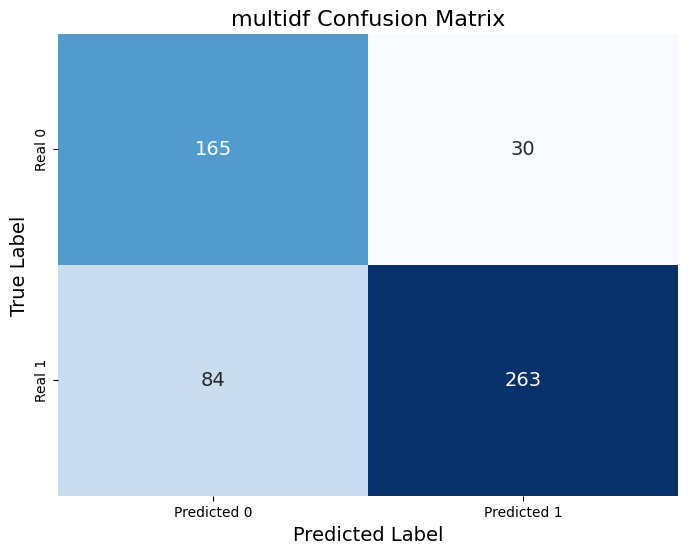

Precision: 0.8976109215017065
Recall: 0.7579250720461095
F1-score: 0.821875
Accuracy: 0.7896678966789668


In [ ]:
true_positive = ((multidf['판별라벨'] == '1') & (multidf['진짜라벨'] == '1')).sum()
false_positive = ((multidf['판별라벨'] == '1') & (multidf['진짜라벨'] == '0')).sum()
true_negative = ((multidf['판별라벨'] == '0') & (multidf['진짜라벨'] == '0')).sum()
false_negative = ((multidf['판별라벨'] == '0') & (multidf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('multidf Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Precision 계산
precision = true_positive / (true_positive + false_positive)

# Recall 계산
recall = true_positive / (true_positive + false_negative)

# F1-score 계산
f1_score = 2 * (precision * recall) / (precision + recall)

# Accuracy 계산
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy:", accuracy)


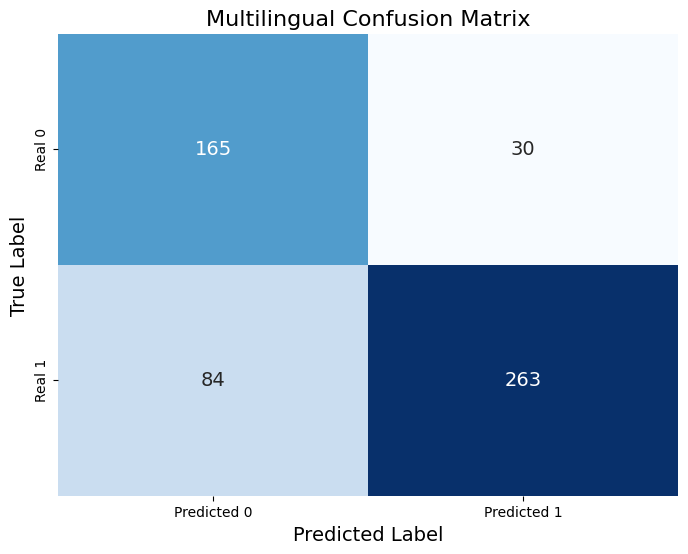

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임
# multidf = pd.DataFrame({'판별라벨': [0, 1, 0, 1], '진짜라벨': [0, 1, 1, 0]})

# 위양성, 위음성, 진짜 양성, 진짜 음성 계산
true_positive = ((multidf['판별라벨'] == '1') & (multidf['진짜라벨'] == '1')).sum()
false_positive = ((multidf['판별라벨'] == '1') & (multidf['진짜라벨'] == '0')).sum()
true_negative = ((multidf['판별라벨'] == '0') & (multidf['진짜라벨'] == '0')).sum()
false_negative = ((multidf['판별라벨'] == '0') & (multidf['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('Multilingual Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


# fine tuning 후

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 모델을 불러올 경로
model_load_path = '/content/drive/MyDrive/koelect_---'

# 모델 불러오기
model = AutoModelForSequenceClassification.from_pretrained(model_load_path)
tokenizer = AutoTokenizer.from_pretrained("daekeun-ml/koelectra-small-v3-nsmc")


In [ ]:
import json
import sys
import logging
import torch
from torch import nn
from transformers import ElectraConfig
from transformers import ElectraModel, AutoTokenizer, ElectraTokenizer, ElectraForSequenceClassification

logging.basicConfig(
    level=logging.INFO,
    format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(filename='tmp.log'),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger(__name__)

max_seq_length = 128
classes = ['Neg', 'Pos']

tokenizer = AutoTokenizer.from_pretrained("daekeun-ml/koelectra-small-v3-nsmc")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def predict_fn(transformed_inputs, model):
    predicted_classes = []

    for data in transformed_inputs:
        data = data.to(device)
        output = model(**data)

        softmax_fn = nn.Softmax(dim=1)
        softmax_output = softmax_fn(output[0])
        _, prediction = torch.max(softmax_output, dim=1)

        predicted_class_idx = prediction.item()
        predicted_class = classes[predicted_class_idx]
        score = softmax_output[0][predicted_class_idx]
        logger.info("predicted_class: {}".format(predicted_class))

        prediction_dict = {}
        prediction_dict["predicted_label"] = predicted_class
        prediction_dict['score'] = score.cpu().detach().numpy().tolist()

        jsonline = json.dumps(prediction_dict)
        logger.info("jsonline: {}".format(jsonline))
        predicted_classes.append(jsonline)

    predicted_classes_jsonlines = "\n".join(predicted_classes)
    return predicted_classes_jsonlines


def output_fn(outputs, accept="application/jsonlines"):
    return outputs, accept

In [ ]:
def input_fn(input_data, content_type="text/plain"):
    # 입력 데이터를 토큰화하여 반환
    encode_plus_token = tokenizer.encode_plus(
        input_data,
        max_length=max_seq_length,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding="max_length",
        return_attention_mask=True,
        return_tensors="pt",
        truncation=True,
    )
    return [encode_plus_token]


In [ ]:
def model_fn(model_path=None):
    ####
    # If you have your own trained model
    # Huggingface pre-trained model: 'monologg/koelectra-small-v3-discriminator'
    ####
    #config = ElectraConfig.from_json_file(f'{model_path}/config.json')
    #model = ElectraForSequenceClassification.from_pretrained(f'{model_path}/model.pth', config=config)

    # Download model from the Huggingface hub
    model = AutoModelForSequenceClassification.from_pretrained(model_load_path)
    #model.to(device)
    return model

In [ ]:
s =df['Sentence'][47]
print(s)

In [ ]:
model = model_fn()
transformed_inputs = input_fn(s)
predicted_classes_jsonlines = predict_fn(transformed_inputs, model)
model_outputs = output_fn(predicted_classes_jsonlines)
print(model_outputs[0])

In [ ]:


data = json.loads(model_outputs[0])

# 'predicted_label' 키의 값을 추출
predicted_label = data['predicted_label']
predicted_label

In [ ]:
import pandas as pd
electdf2 = pd.DataFrame(columns=['판별라벨', '진짜라벨', '내용'])

for i in range(len(df)):
    transformed_inputs = input_fn(df['Sentence'][i])
    predicted_classes_jsonlines = predict_fn(transformed_inputs, model)
    model_outputs = output_fn(predicted_classes_jsonlines)
    data = json.loads(model_outputs[0])
    predicted_label = data['predicted_label']

    # 새로운 행을 생성하여 값을 할당합니다.
    electdf2.loc[i, '판별라벨'] = predicted_label
    electdf2.loc[i, '진짜라벨'] = df['Label'][i]
    electdf2.loc[i, '내용'] = df['Sentence'][i]

# '판별라벨'과 '진짜라벨' 열을 문자열로 변환합니다.
electdf2['판별라벨'] = electdf2['판별라벨'].astype(str)
electdf2['진짜라벨'] = electdf2['진짜라벨'].astype(str)

electdf2['판별라벨'] = electdf2['판별라벨'].map({'Pos': '1', 'Neg': '0'})

# '판별라벨'과 '진짜라벨' 열이 같은 경우를 세어봅니다.
same_count = electdf2[electdf2['판별라벨'] == electdf2['진짜라벨']].shape[0]

print("두 열의 값이 같은 경우의 수:", same_count / len(df))


두 열의 값이 같은 경우의 수: 0.8948339483394834


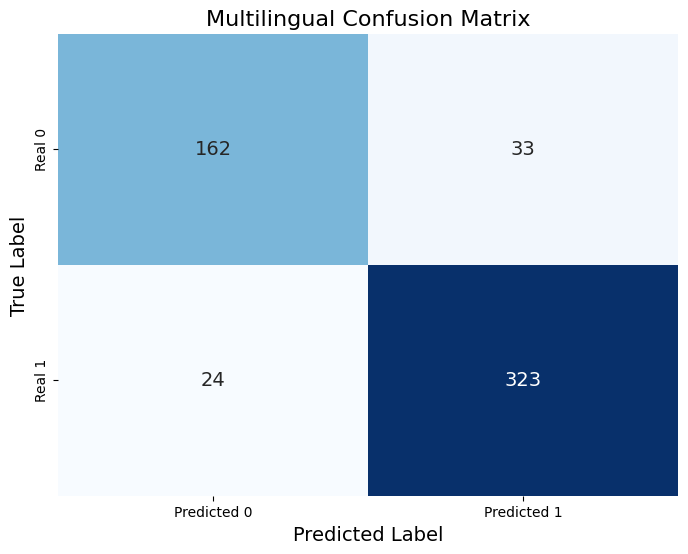

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임
# electdf2 = pd.DataFrame({'판별라벨': [0, 1, 0, 1], '진짜라벨': [0, 1, 1, 0]})

# 위양성, 위음성, 진짜 양성, 진짜 음성 계산
true_positive = ((electdf2['판별라벨'] == '1') & (electdf2['진짜라벨'] == '1')).sum()
false_positive = ((electdf2['판별라벨'] == '1') & (electdf2['진짜라벨'] == '0')).sum()
true_negative = ((electdf2['판별라벨'] == '0') & (electdf2['진짜라벨'] == '0')).sum()
false_negative = ((electdf2['판별라벨'] == '0') & (electdf2['진짜라벨'] == '1')).sum()

# 2x2 행렬 생성
confusion_matrix = pd.DataFrame([[true_negative, false_positive], [false_negative, true_positive]],
                                index=['Real 0', 'Real 1'],
                                columns=['Predicted 0', 'Predicted 1'])

# plot 생성
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title('Multilingual Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()
